# Data Visualization: A Walkthrough

This notebook takes an existing data visualization and aims to improve it based in some principles of good design. 

Here's the original data visualization:

![original infographic](images/infographic.png)

**Exercise**: Write down short statements regarding the following questions
* When you first looked at the figure, what did you first study: the visualization or the text?
* What key point do you think the data visualzation is meant to convey?
* How well does the type of data visualization and its physical appearance (form, colours, contrast etc) convey the information given in the text?
* What alternative forms might you choose to represent the data?

### Data Visualization Libraries

There are *many* different data visualization libraries out there in many different languages! For example [d3.js](https://d3js.org) has become very popular in the online world to make interactive visualizations and websites. But even within Python, there's a large number of libraries, and it can be difficult to choose which one might fulfil your purpose best. 

Here, we are going to work with [matplotlib](https://matplotlib.org) and [seaborn](https://seaborn.pydata.org), but we encourage you to recreate this notebook (or go a different route!) with another language and/or package. If you do, please feel free to make a pull request to our [AstroHackWeek 2018 repository](https://github.com/AstroHackWeek/AstroHackWeek2018) on GitHub, so that others can see your efforts and learn more about your preferred way of working with data!

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

# some style choices I like
sns.set_style("whitegrid") # include grid, white background
sns.set_context("talk") # larger text sizes by default

### The data

Let's copy the data from the figure. This is easy, since the information was printed right next to the figure. As an aside: there may be good reasons to include the data the visualization is drawn from within a figure. However, when you need to include the data as the only way to make your data visualization legible, you may want to think whether there is a better way to visualize the data than your current choice.

Let's first import some libraries and then make a pandas Series with our data:

In [2]:
import numpy as np
import pandas as pd

In [3]:
d = {"SEO": 68.9, "Email": 56.7, "PPC": 52.4, "PR": 48.5, "Direct Mail": 37.4, "OMB": 19.9}

df = pd.Series(d)

In [4]:
df

Direct Mail    37.4
Email          56.7
OMB            19.9
PPC            52.4
PR             48.5
SEO            68.9
dtype: float64

### Choosing a Visualization Type

One of the key choices to make for visualizing data is the *type* of data visualization. 
Which data visualization you choose is a matter of the *function* of your visualization and the *type* of your *data*. Are you showing fractional pieces of a whole? Are you comparing a quantity between different data sets? Do you have data as a function of time or wavelength?

One great resource is the [data visualization catalogue](https://datavizcatalogue.com). It's basically a library of different types of data visualizations, each with a description, what it's often used for, and what the potential pitfalls are. One useful way to sort this catalogue is by function, which can be helpful in defining what it is you need.

**Exercise**: Go back to your answers to the questions above, and use the data visualization catalogue to find a type of data visualization that might represent the data above more clearly.

Our example figure is a particular form of [pie chart](https://datavizcatalogue.com/methods/pie_chart.html). Pie charts are often used to represent fractions of a whole. While they're often not as bad as their reputation, in this case, they're *not* a good way to visualize the data. For a pie chart to work, the different data entries *must* add up to 100%. As is very clear above, this is not the case, which is presumably why the graphic designer chose to nest the different pie slices. The problem whith this is that you can't really tell anything about the slices behind the first one, except that some are bigger than others, and it's hard to track which slice belongs to which data entry (you may or may not have noticed that the smallest slice actually connects to the largest number, and the largest slice connects to the smallest number). 

So what's a better way to present this data? Something that's definitely true for data visualization: simple is often better. So let's do a bar chart instead:

In [5]:
df.index

Index(['Direct Mail', 'Email', 'OMB', 'PPC', 'PR', 'SEO'], dtype='object')

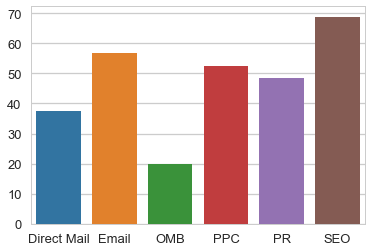

In [6]:
# set up the plot
fig = plt.subplots(1, 1, figsize=(6,4))

# make the bar chart
sns.barplot(x=df.index, y=df.values)

This figure immediately gives you more information about the data than the previous version did. In particular, it's immediately clear which bar belongs to which entry without confusing lines connecting them, and the order is also immediately clear: SEO has the largest return-on-investment, Online Media Buys the smallest. 

Without having the numbers printed on the figure, you can still fairly easily read off the approximate value of those numbers from the axes. In this case, I would only include the numbers on the figure if they're crucially important to the narrative of the figure.  

### Colour

Let's talk about colour! Along with shape and type, this is one of the most important decisions you can make. One reason for this is that recognizing things by colour is a pre-attentive task: your brain can perform it in the span of less than a hundred milliseconds, without you having to consciously think about it! That means colour is an important tool to guide your viewer in the right direction, but it can also confuse a lot.

Let's say our narrative is that e-mail advertising is *almost* as effective as Search Engine Optimization (maybe because it's much cheaper, and we're trying to convince someone to put some money in it). 

In the figure above, each bar is a different colour. Moreover, all the colours are similarly weighted (they're equally opaque, and have similar visual weights). This sort of implies that they're all equally important, and the colour itself conveys no useful information. It more detracts from the information than it adds.

So let's use colour a little more mindfully:


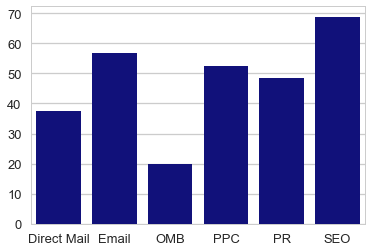

In [7]:
# make the bar chart
sns.barplot(x=df.index, y=df.values, color="darkblue")

We can use the gestalt concept of continuity to order this by y height. This allows us to decipher the plot information quicker.

In [8]:
df.sort_values(inplace=True, ascending=False)

In [9]:
df

SEO            68.9
Email          56.7
PPC            52.4
PR             48.5
Direct Mail    37.4
OMB            19.9
dtype: float64

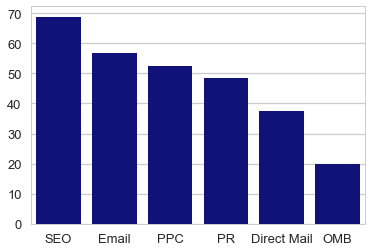

In [10]:
# make the bar chart
sns.barplot(x=df.index, y=df.values, color="darkblue")

This is much more boring, but much less confusing. We can color the bars by another dimension to convey more information, let's say here we want to color them by height. We do this by using a sequential color palette. This still allows the red bar to jump out, and gives some weight to the remaining bars.

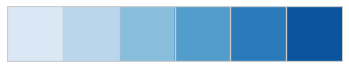

In [11]:
sns.palplot(sns.color_palette("Blues"))

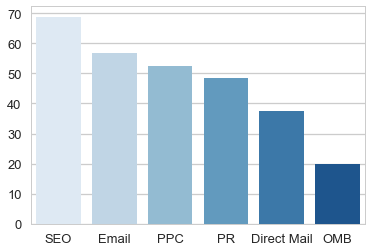

In [12]:
# make the bar chart
sns.barplot(x=df.index, y=df.values, palette="Blues")

Now perhaps, instead, we'd actually want to highlight the e-mail data point. 

We can do this in seaborn by not passing a single colour, but passing a colour for each bar separately:

In [13]:
colours = ["darkblue", "red", "darkblue", "darkblue", "darkblue", "darkblue"]

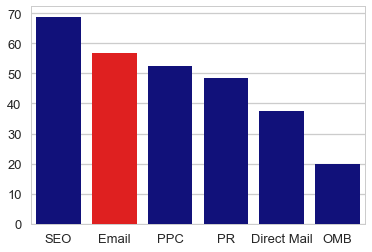

In [14]:
# make the bar chart
sns.barplot(x=df.index, y=df.values, palette=colours)

Now the red bar immediately jumps out, doesn't it? However, the bars are still of a similar visual weight. This might not be ideal, for example if the figure is printed in greyscale, where very different colours might come out very similarly.

Another important consideration is colour blindness. 

Here's the sampe plot above in red and green:

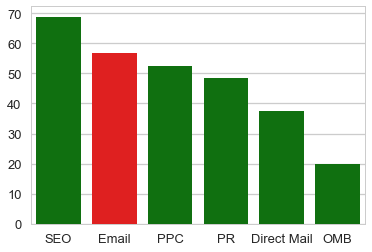

In [15]:
bad_colours = ["green", "red", "green", "green", "green", "green"]

# make the bar chart
sns.barplot(x=df.index, y=df.values, palette=bad_colours)

And here is simulation of the same figure for deuteranopia, the most common kind of colour blindness:

![plot shown in deuteranopia colors](images/deuteranopia.png)

The best way to make this figure readable in both greyscale and to people with colour blindness is to not rely on colour alone for distinguishing elements. For example, you can also rely on intensity:

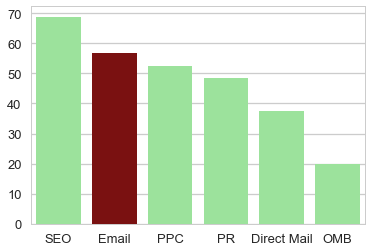

In [16]:
colours = ["lightgreen", "darkred", "lightgreen", "lightgreen", "lightgreen", "lightgreen"]

# make the bar chart
sns.barplot(x=df.index, y=df.values, palette=colours)

Or you can change the shape (e.g. in the case of a scatter plot), make the bars slightly transparent (which is strictly also a change in intensity), or include some kind of other pattern that will distinguish your important elements from the rest.

Note that in everything you do, **contrast is important**, not only but especially for readers with vision deficiencies. Make sure that there is always sufficient contrast in those elements of your plot that are crucial for readers to understand the message conveyed in it.

There are a number of great tools out there to check for things like contrast and colour combinations. I like [ColorOracle](https://colororacle.org), which is a nifty little tool that simulates what your screen would look like to a colour-blind person. But there are also websites like [this one](https://www.color-blindness.com/coblis-color-blindness-simulator/) where you can upload an image or a figure and it will simulate how your figure would look like to a colour-blind person.

### Other Features

Let's make this figure even more aligned with our ficticious narrative. In particular, you may have noticed that our y-axis is unlabelled, and perhaps we'd like to emphasize that e-mails in particular have a return-on-investment of over 50 percent.

So let's actually add the text back, but only the important part. I'm also going to change the colours, firstly because I don't find the red and green combination particularly appealing, but additionally, making the other columns light grey visually sends them to the background, thereby further emphasizing the importance of the red column:

Text(0.6,58,'53.4%')

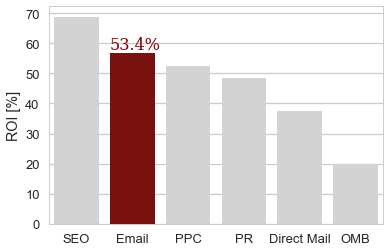

In [17]:
colours = ["lightgray", "darkred", "lightgray", "lightgray", "lightgray", "lightgray"]

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

fig, ax = plt.subplots(1, 1, figsize=(6,4))
# make the bar chart
sns.barplot(x=df.index, y=df.values, palette=colours, ax=ax)
ax.set_ylabel("ROI [%]")
ax.text(0.6, 58, "53.4%", fontdict=font)

### A Note on Gridlines

As a final note, a short thing about gridlines. Gridlines can be incredibly helpful to guide the eye. However, be aware that different gridlines will emphasize different parts of your data visualization. Generally, widely spaced gridlines emphasize large-scale differences (like above for the OMB and the direct mail). If you're interested in emphasizing smaller changes, you might want to use a narrower spacing between gridlines in order to make it easier for readers to see small changes (e.g. between "email", "PPC" and "PR" in the figure above):

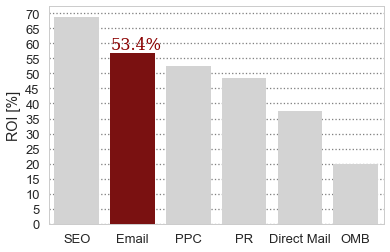

In [25]:
import matplotlib.ticker as ticker


fig, ax = plt.subplots(1, 1, figsize=(6,4))
# make the bar chart
sns.barplot(x=df.index, y=df.values, palette=colours, ax=ax)
ax.set_ylabel("ROI [%]")
ax.text(0.6, 58, "53.4%", fontdict=font)

ax.yaxis.set_major_locator(ticker.MultipleLocator(5))


Again using the concepts of gestalt, we can see that while these gridlines give us finer resolution, they also take up more visual space. We can place them in the background by adjusting their color and weight.

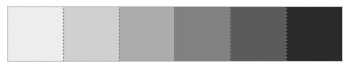

In [26]:
sns.palplot(sns.color_palette("Greys"))

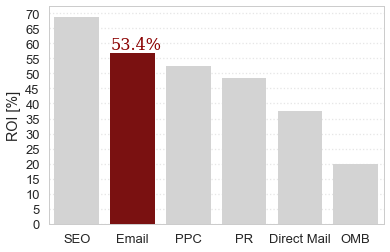

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
# make the bar chart
sns.barplot(x=df.index, y=df.values, palette=colours, ax=ax)
ax.set_ylabel("ROI [%]")
ax.text(0.6, 58, "53.4%", fontdict=font)

ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
sns.set_style({'grid.color': '0.5', 'grid.linestyle': ':'})

This figure might be less exciting than the infographic above, but it is much more straightforward to read and understand, and much more informative with respect to the narrative we want to present.

**Exercise**: Build your own narrative around this data! Make up your own narrative to convey with this data, and then choose a type of data visualization, a set of colours and other elements of your figure accordingly! You can explore the data visualization catalogue for different types of visualizations to try out, and you can explore different combinations of colour palettes, intensities and values of transparency to help you emphasize the most important information. When you're done, please make a pull request to the [Astro Hack Week GitHub repo](https://github.com/AstroHackWeek/AstroHackWeek2018), so that others can learn from your ideas!